In [36]:

import numpy as np
import pandas as pd
# get the features from the file features.txt
features = list()
path = r'C:\Users\sonic\Downloads\1.1. HumanActivityRecognition\HAR\UCI_HAR_Dataset'
with open(path + r'\features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [37]:

# Make feature names unique by adding suffix to duplicates
features = pd.Series(features)
features = features + '_' + features.groupby(features).cumcount().astype(str)
features = features.str.replace('_0$', '', regex=True)
features = features.tolist()

# get the data from txt files to pandas dataframe
X_train = pd.read_csv(r'C:\Users\sonic\Downloads\1.1. HumanActivityRecognition\HAR\UCI_HAR_Dataset\train\X_train.txt', sep=r'\s+', header=None, names=features)
# add subject column to the dataframe
X_train['subject'] = pd.read_csv(r'C:\Users\sonic\Downloads\1.1. HumanActivityRecognition\HAR\UCI_HAR_Dataset\train\subject_train.txt', header=None).iloc[:, 0]
y_train = pd.read_csv(r'C:\Users\sonic\Downloads\1.1. HumanActivityRecognition\HAR\UCI_HAR_Dataset\train\y_train.txt', names=['Activity'])['Activity']
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})
# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
4525,0.283203,-0.047024,-0.168986,0.384949,0.176898,-0.310332,0.381757,0.122611,-0.332984,0.465563,...,-0.034924,0.558036,0.258975,-0.854858,-0.78433,0.22296,-0.066506,22,3,WALKING_DOWNSTAIRS


In [38]:
train.shape

(7352, 564)

In [39]:

#Obtain test data
# get the data from txt files to pandas dataframe
#X_test = pd.read_csv('UCI_HAR_dataset/test/X_test.txt', delim_whitespace=True, header=None, names=features)
X_test = pd.read_csv(r'C:\Users\sonic\Downloads\1.1. HumanActivityRecognition\HAR\UCI_HAR_Dataset\test\X_test.txt', sep=r'\s+', header=None, names=features)
# add subject column to the dataframe
X_test['subject'] = pd.read_csv(r'C:\Users\sonic\Downloads\1.1. HumanActivityRecognition\HAR\UCI_HAR_Dataset\test\subject_test.txt', header=None).iloc[:, 0]
# get y labels from the txt file
y_test = pd.read_csv(r'C:\Users\sonic\Downloads\1.1. HumanActivityRecognition\HAR\UCI_HAR_Dataset\test\y_test.txt', names=['Activity'])['Activity']
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',
                       4:'SITTING', 5:'STANDING',6:'LAYING'})
# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
718,0.3659,-0.031332,-0.024079,0.183421,-0.344568,-0.403268,0.09989,-0.3422,-0.412337,0.4803,...,-0.37837,-0.840289,-0.864326,0.848585,-0.960939,0.116422,-0.003858,9,3,WALKING_DOWNSTAIRS


In [40]:

test.shape

(2947, 564)

In [41]:
#Data cleaning
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


In [42]:
#Checking Null values
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


In [43]:
#Checking for data imbalanced

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

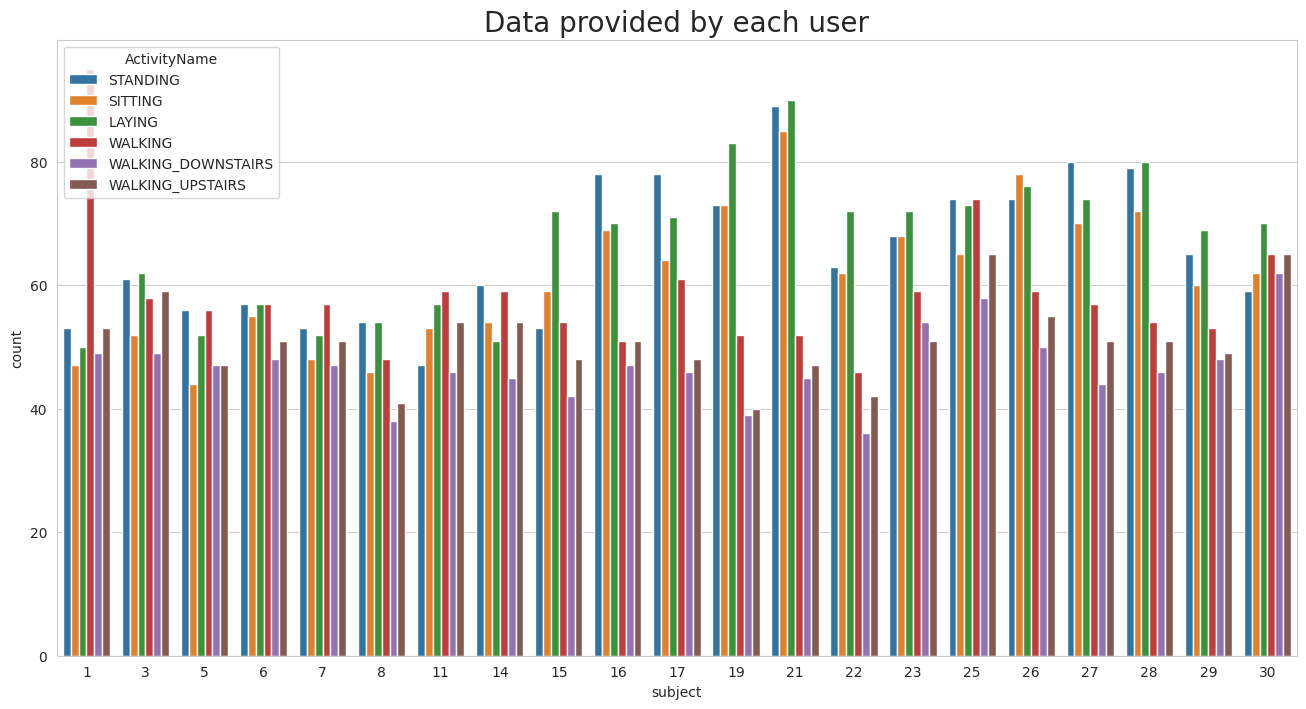

In [44]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()

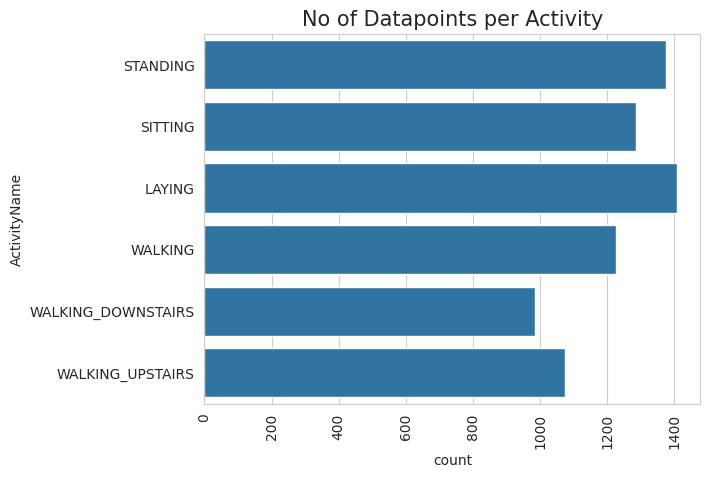

In [15]:

plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

In [45]:
#Changing features name
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

In [46]:

#save this in csv dataframe
train.to_csv(r'C:\Users\sonic\Downloads\1.1. HumanActivityRecognition\HAR\UCI_HAR_Dataset\train\train.csv', index=False)
test.to_csv(r'C:\Users\sonic\Downloads\1.1. HumanActivityRecognition\HAR\UCI_HAR_Dataset\test\test.csv', index=False)

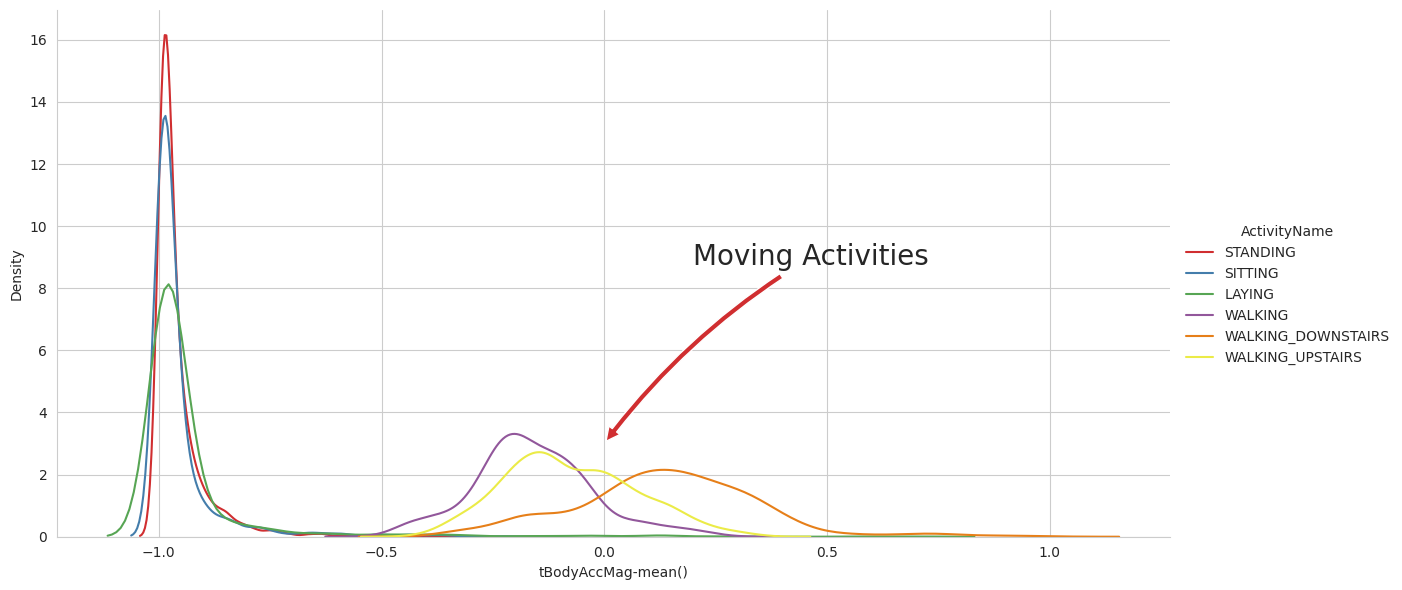

In [47]:

#Performing EDA
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', height=6, aspect=2)
facetgrid.map(sns.kdeplot,'tBodyAccMag-mean()')\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

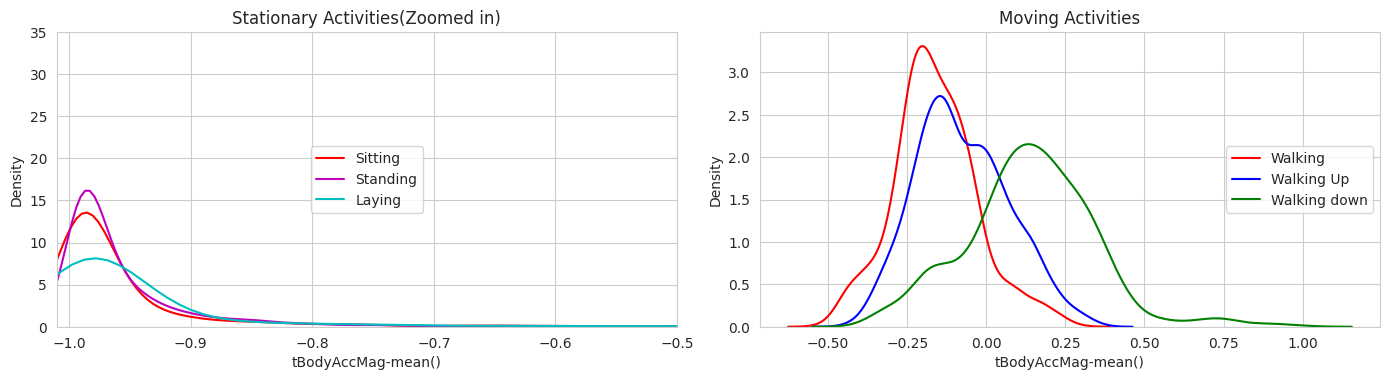

In [48]:

# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.kdeplot(data=df4, x='tBodyAccMag-mean()',color = 'r', label = 'Sitting')
sns.kdeplot(data=df5, x='tBodyAccMag-mean()',color = 'm',label = 'Standing')
sns.kdeplot(data=df6, x='tBodyAccMag-mean()',color = 'c', label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')
plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.kdeplot(data=df1, x='tBodyAccMag-mean()',color = 'red', label = 'Walking')
sns.kdeplot(data=df2, x='tBodyAccMag-mean()',color = 'blue',label = 'Walking Up')
sns.kdeplot(data=df3, x='tBodyAccMag-mean()',color = 'green', label = 'Walking down')
plt.legend(loc='center right')
plt.tight_layout()
plt.show()

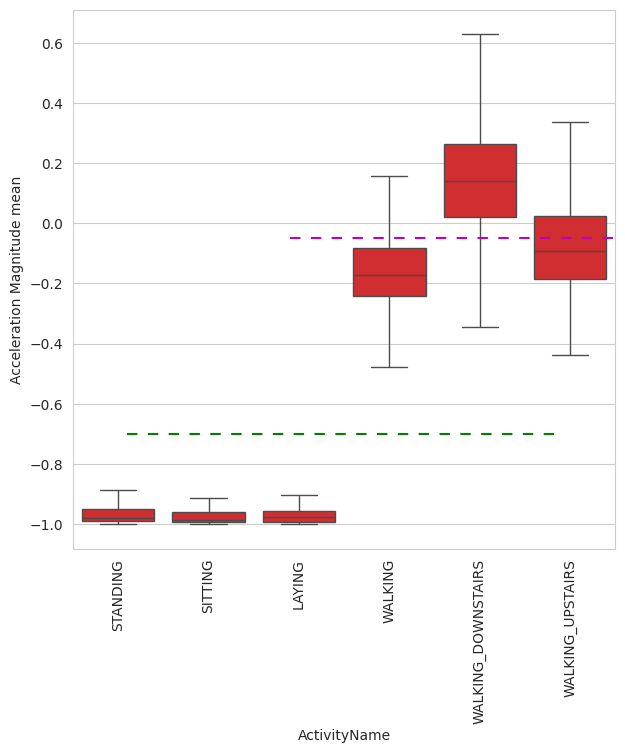

In [49]:

#Magnitude of acceleration can saperate it well
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMag-mean()',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

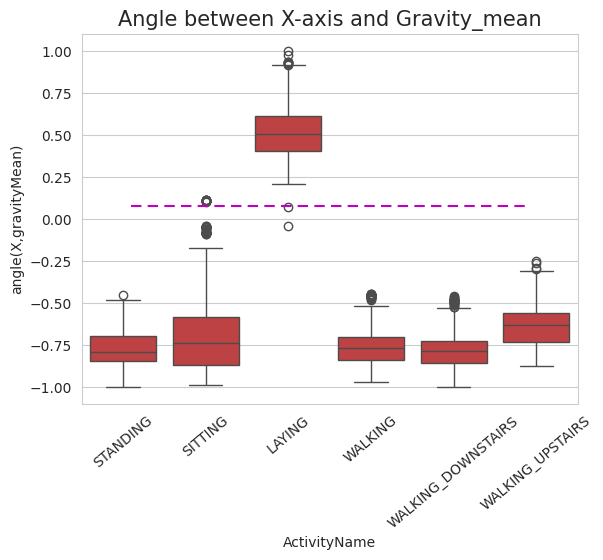

In [50]:

#Position of GravityAcceleration Components also matters
sns.boxplot(x='ActivityName', y='angle(X,gravityMean)', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

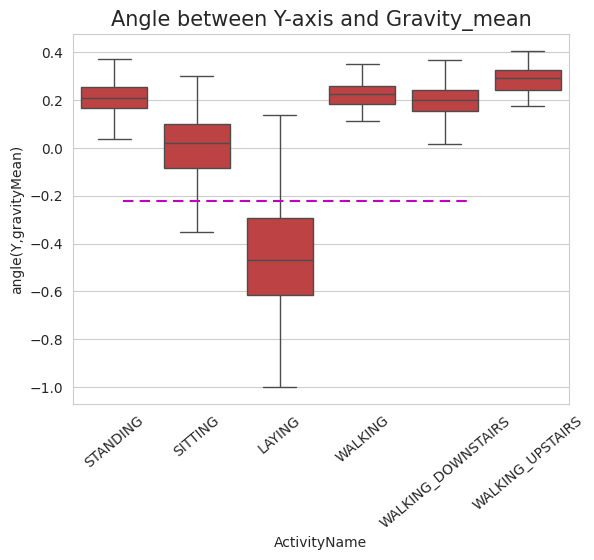

In [22]:
sns.boxplot(x='ActivityName', y='angle(Y,gravityMean)', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.037s...
[t-SNE] Computed neighbors for 7352 samples in 9.625s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.597443
[t-SNE] Computed conditional probabilities in 0.055s
[t-SNE] Iteration 50: error = 119.3301849, gradient norm = 0.0439654 (50 iterations in 4.961s)
[t-SNE] Iteration 100: error = 105.1756363, gradient norm = 0.0240560 (50 iterations in 

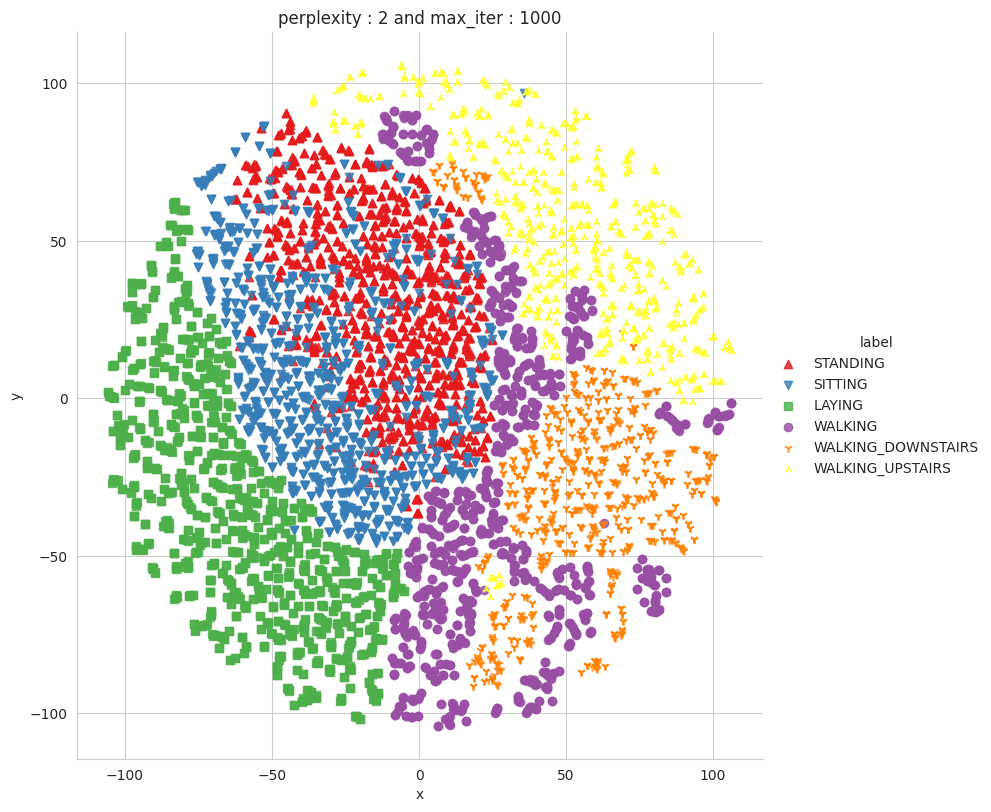

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.034s...
[t-SNE] Computed neighbors for 7352 samples in 1.575s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.096s
[t-SNE] Iteration 50: error = 107.1319275, gradient norm = 0.0390028 (50 iterations in 5.471s)
[t-SNE] Iteration 100: error = 95.6971207, gradient norm = 0.0150989 (50 iteration

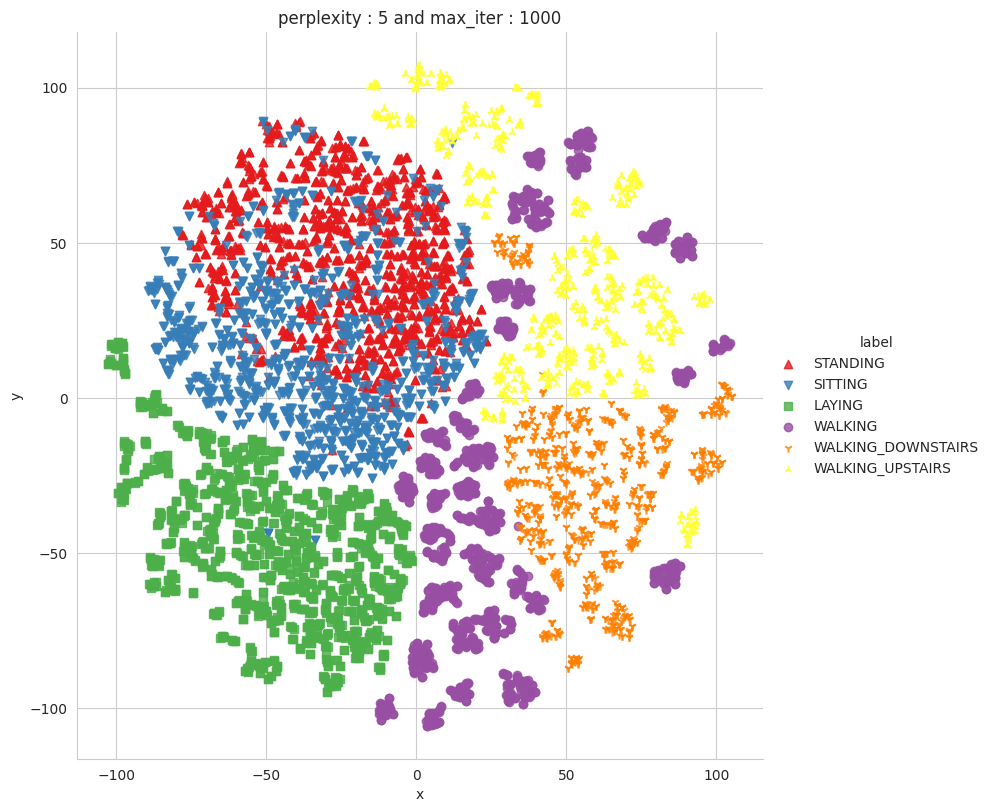

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.025s...
[t-SNE] Computed neighbors for 7352 samples in 1.564s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.158s
[t-SNE] Iteration 50: error = 97.8996048, gradient norm = 0.0360147 (50 iterations in 6.009s)
[t-SNE] Iteration 100: error = 88.9300232, gradient norm = 0.0104774 (50 iteration

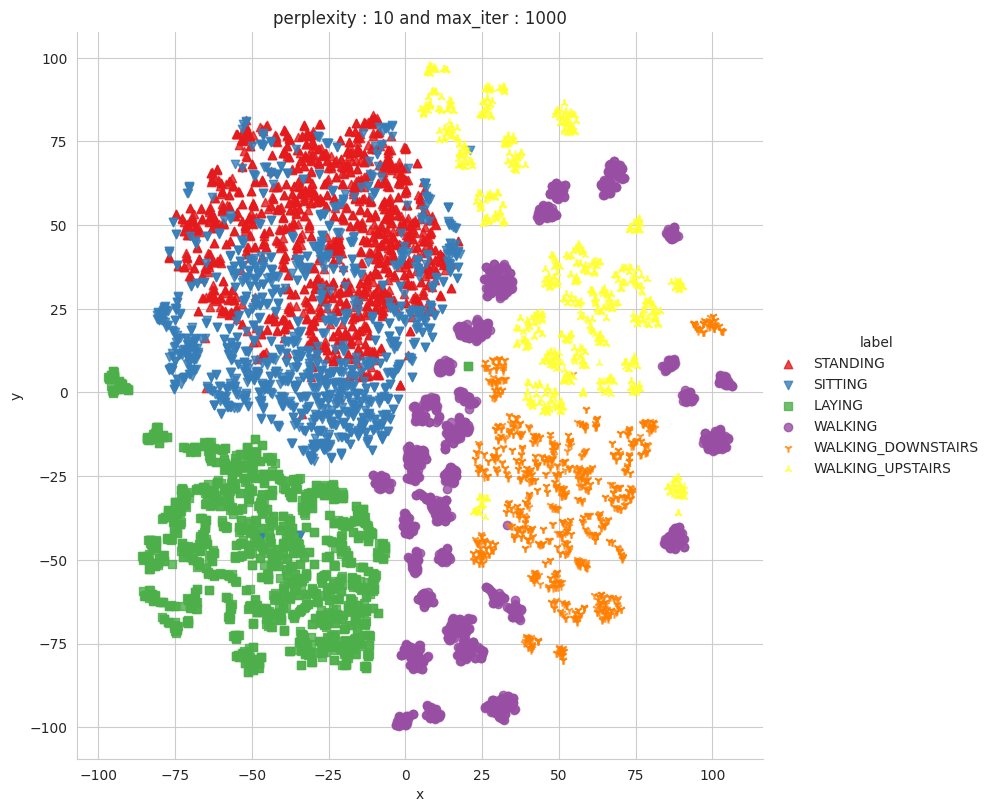

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.025s...
[t-SNE] Computed neighbors for 7352 samples in 1.591s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.292s
[t-SNE] Iteration 50: error = 89.2810745, gradient norm = 0.0308507 (50 iterations in 6.675s)
[t-SNE] Iteration 100: error = 82.9607697, gradient norm = 0.0077126 (50 iteration

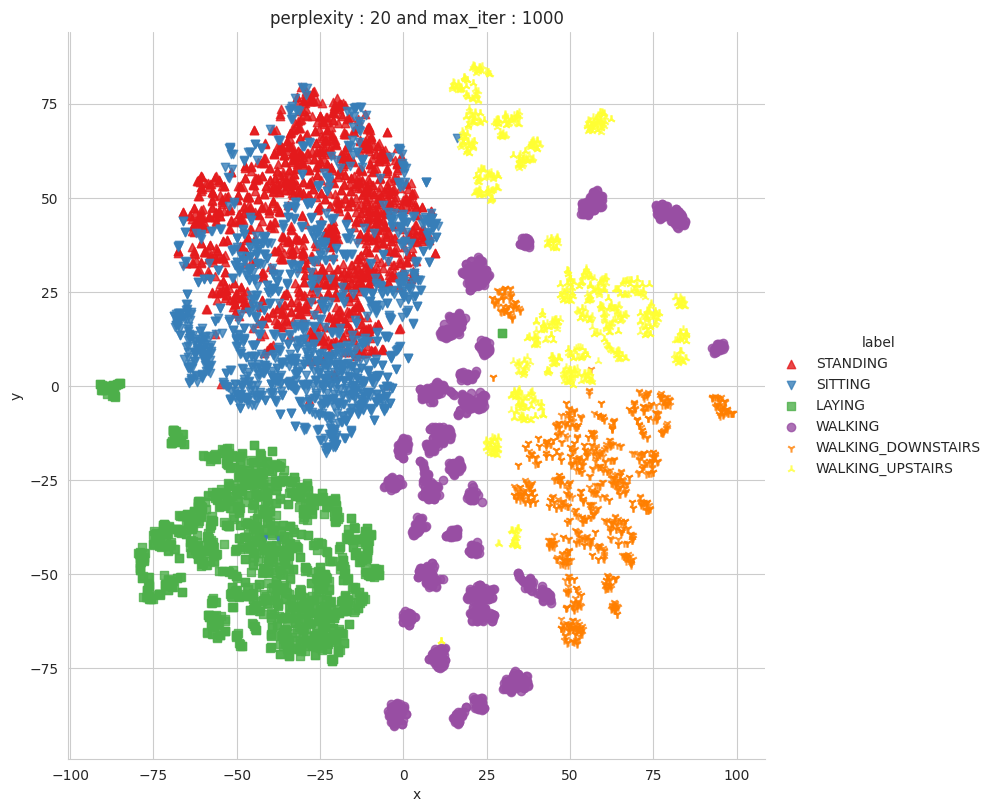

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.019s...
[t-SNE] Computed neighbors for 7352 samples in 1.740s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.749s
[t-SNE] Iteration 50: error = 78.8822174, gradient norm = 0.0258351 (50 iterations in 9.841s)
[t-SNE] Iteration 100: error = 75.2916031, gradient norm = 0.0052978 (50 iteratio

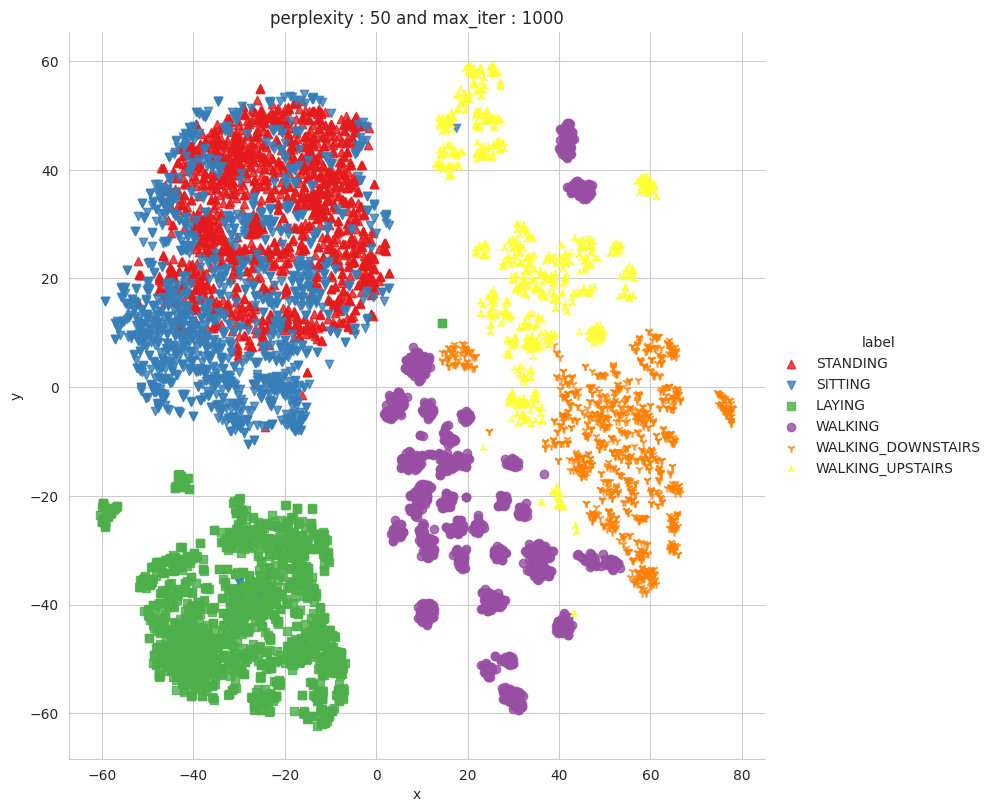

Done


In [25]:


#Applying t-sne on the data
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# performs t-sne with different perplexity values and their repective plots..
def perform_tsne(X_data, y_data, perplexities, max_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, max_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity, max_iter=max_iter).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8,
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, max_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, max_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')

# Fixed variable name and function call
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data=X_pre_tsne, y_data=y_pre_tsne, perplexities=[2,5,10,20,50])

In [51]:

import numpy as np
import pandas as pd

In [52]:

X_train = pd.read_csv(r'C:\Users\sonic\Downloads\1.1. HumanActivityRecognition\HAR\UCI_HAR_Dataset\train\X_train.txt')
#X_test = pd.read_csv(r'C:\Users\sonic\Downloads\1.1. HumanActivityRecognition\HAR\UCI_HAR_Dataset\test\subject_test.txt')
y_test = pd.read_csv(r'C:\Users\sonic\Downloads\1.1. HumanActivityRecognition\HAR\UCI_HAR_Dataset\test\y_test.txt')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [53]:
train.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING


In [54]:

# get X_train and y_train from csv files
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [55]:

#get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [56]:

print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


In [57]:
#Labels that are useful in plotting confusion matrix

labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [58]:
# Add missing import at the top
from sklearn import metrics

# function to plot the confusion matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [34]:
# Generic function to run any model specified
from datetime import datetime

def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   
    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusion matrix
    plt.figure(figsize=(8,8))
    # Removed plt.grid(False) line to fix recursion error
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results


In [35]:
# Method to print the Gridsearch Attributes
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))
    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))
    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))
    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))


training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Done 
 

training_time(HH:MM:SS.ms) - 0:01:55.065170


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.014067


---------------------
|      Accuracy      |
---------------------

    0.9630132337970818


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  1 428  58   0   0   4]
 [  0  11 520   1   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   3 409   8]
 [  0   0   0  22   0 449]]


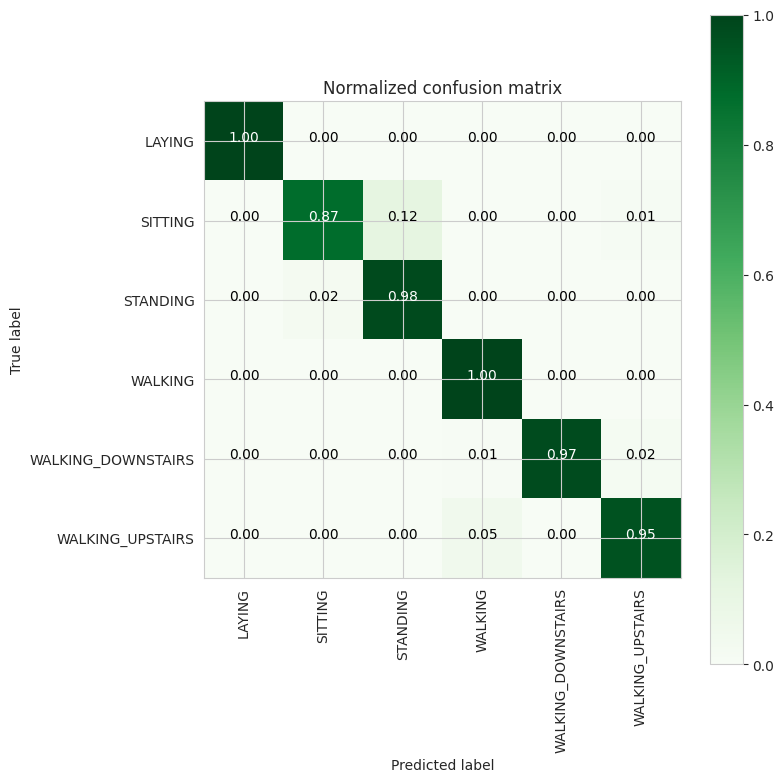

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [36]:
#1.  Logistic Regression with Grid Search
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression(solver='liblinear', max_iter=1000)
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results = perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

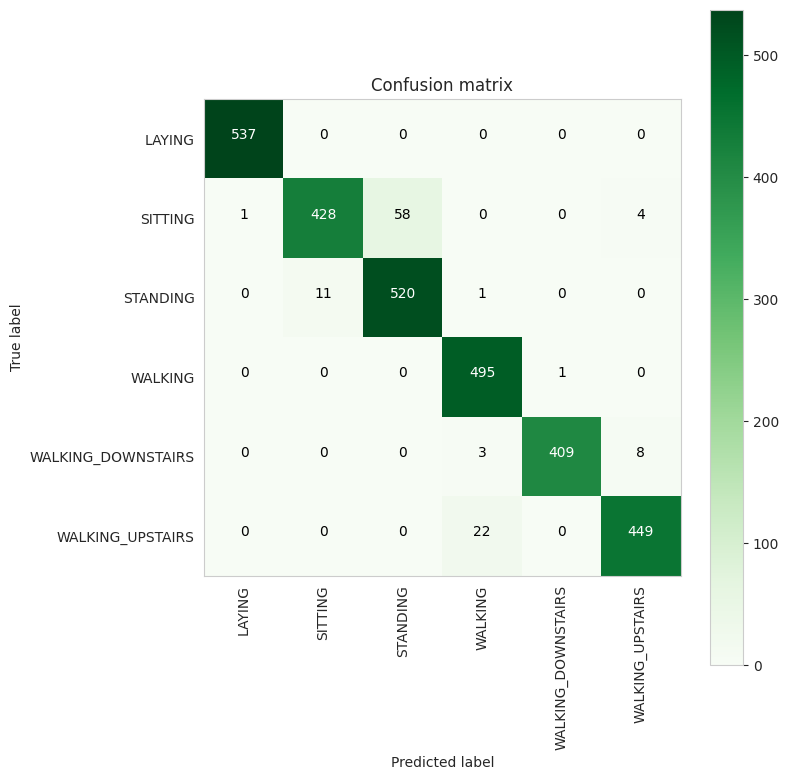

In [37]:

plt.figure(figsize=(8,8))
ax = plt.gca()  # Get current axes
ax.set_axisbelow(True)
ax.grid(False)  # This might work on axes level
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens)
plt.show()

In [38]:

# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=30, max_iter=1000, solver='liblinear')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 30, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9460033805443843



In [41]:
#2. Linear SVC with Gridsearch

from sklearn.svm import LinearSVC

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Done 
 

training_time(HH:MM:SS.ms) - 0:00:45.257772


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.021306


---------------------
|      Accuracy      |
---------------------

    0.9670851713607058


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 428  58   0   0   3]
 [  0   9 522   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   3 412   5]
 [  0   0   0  16   0 455]]


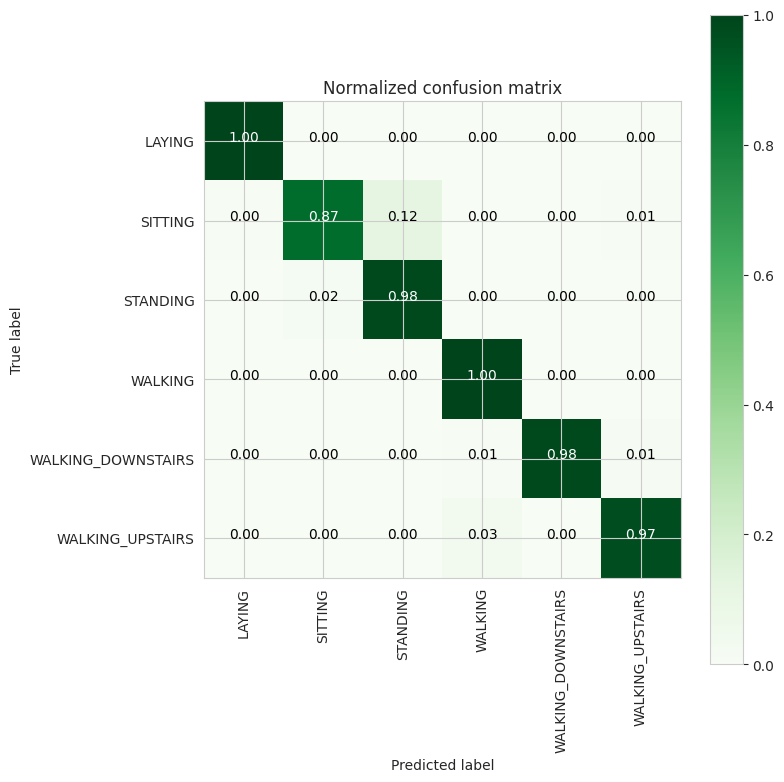

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.97      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



In [42]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [43]:

print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=0.5, tol=5e-05)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.5}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9419282546465222



training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:06:27.039609


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.053934


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


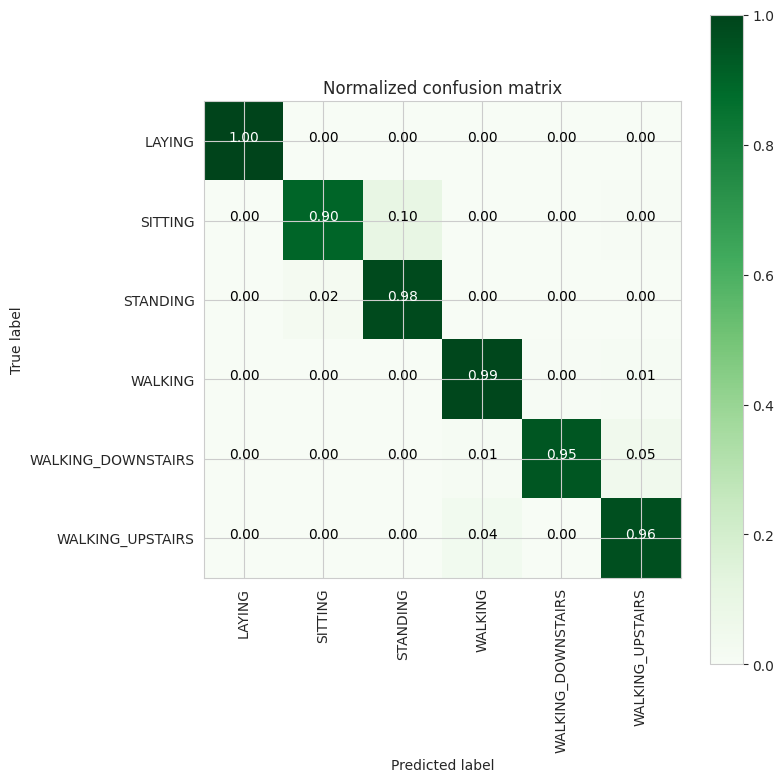

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [46]:
#3. Kernel SVM with Gridsearch
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [47]:

print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=16, gamma=0.0078125)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9447834551903698



training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:37.409286


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.016785


---------------------
|      Accuracy      |
---------------------

    0.8761452324397693


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 373 118   0   0   0]
 [  0  58 474   0   0   0]
 [  0   0   0 472  18   6]
 [  0   0   0  20 353  47]
 [  0   0   0  67  31 373]]


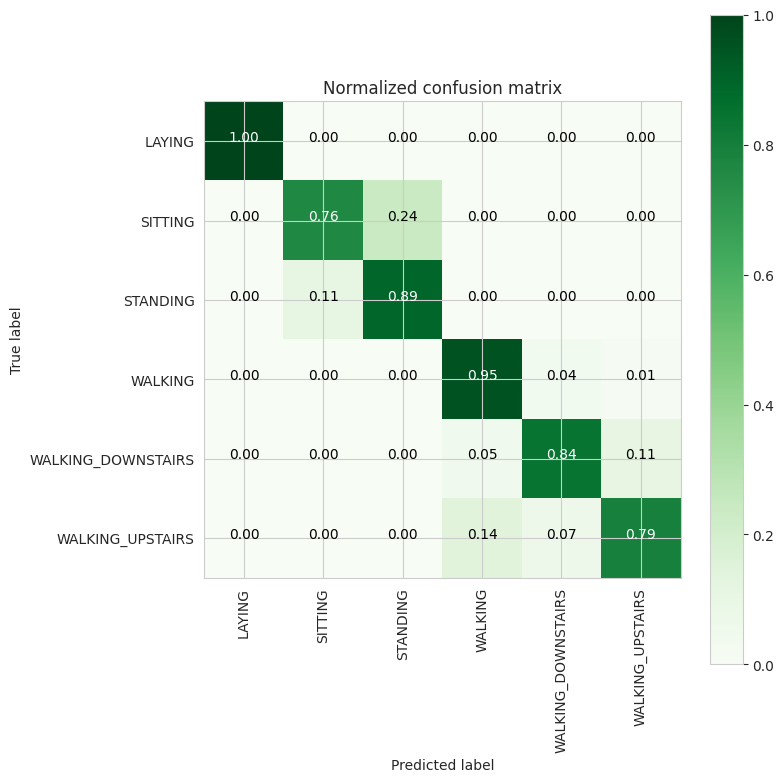

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.87      0.76      0.81       491
          STANDING       0.80      0.89      0.84       532
           WALKING       0.84      0.95      0.89       496
WALKING_DOWNSTAIRS       0.88      0.84      0.86       420
  WALKING_UPSTAIRS       0.88      0.79      0.83       471

          accuracy                           0.88      2947
         macro avg       0.88      0.87      0.87      2947
      weighted avg       0.88      0.88      0.88      2947

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(max_depth=9)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 9}

---------------------------------
|   No of CrossValidation sets

In [44]:
#4. Decision Trees with Gridsearch

from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)

print_grid_search_attributes(dt_grid_results['model'])

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:16:27.618025


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.049812


---------------------
|      Accuracy      |
---------------------

    0.9175432643366135


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 424  67   0   0   0]
 [  0  47 485   0   0   0]
 [  0   0   0 482  10   4]
 [  0   0   0  32 341  47]
 [  0   0   0  29   7 435]]


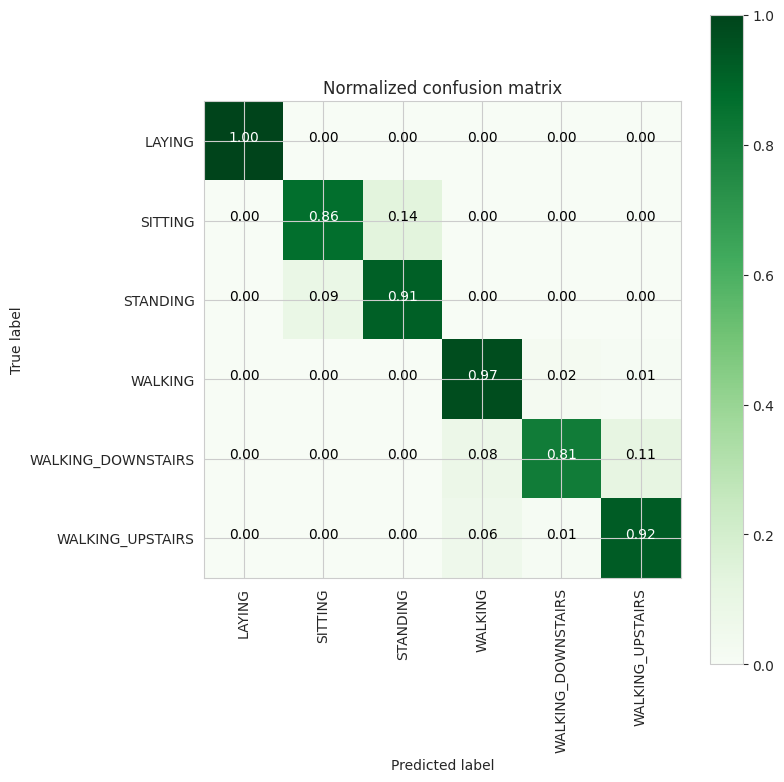

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.90      0.86      0.88       491
          STANDING       0.88      0.91      0.89       532
           WALKING       0.89      0.97      0.93       496
WALKING_DOWNSTAIRS       0.95      0.81      0.88       420
  WALKING_UPSTAIRS       0.90      0.92      0.91       471

          accuracy                           0.92      2947
         macro avg       0.92      0.91      0.91      2947
      weighted avg       0.92      0.92      0.92      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(max_depth=9, n_estimators=110)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 9, 'n_estimators': 110}

-------------------------

In [49]:
#5. Random Forest classifier with Gridsearch

from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

In [ ]:
#6. Gradient Boosted Decision Tree with Gridsearch

from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)

print_grid_search_attributes(gbdt_grid_results['model'])

In [50]:

#Comparing all models
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))
print('Linear SVC          : {:.04}%       {:.04}%'.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))
print('rbf SVM classifier  : {:.04}%       {:.04}%'.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))
print('DecisionTree        : {:.04}%       {:.04}%'.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))
print('Random Forest       : {:.04}%       {:.04}%'.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
#print('GradientBoosting DT : {:.04}%      {:.04}%'.format(rfc_grid_results['accuracy'] * 100,\
#                                                        100-(rfc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 96.3%       3.699%
Linear SVC          : 96.71%       3.291%
rbf SVM classifier  : 96.27%       3.733%
DecisionTree        : 87.61%       12.39%
Random Forest       : 91.75%       8.246%


In [59]:
#Deep Learning
#Importing Libraries

import pandas as pd
import numpy as np

In [60]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])
    

In [61]:
# Data directory
#DATADIR = 'UCI_HAR_Dataset'
#DATADIR = pd.read_csv(r'C:\Users\sonic\Downloads\1.1. HumanActivityRecognition\HAR\UCI_HAR_Dataset.txt')
#X_train = pd.read_csv(r'C:\Users\sonic\Downloads\1.1. HumanActivityRecognition\HAR\UCI_HAR_Dataset\train\X_train.txt')
#DATADIR = "C:\Users\sonic\Downloads\1.1. HumanActivityRecognition\HAR\UCI_HAR_Dataset"
#DATADIR = 'C:\Users\sonic\Downloads\1.1. HumanActivityRecognition\HAR'
#DATADIR = 'C:\Users\sonic\Downloads\1.1. HumanActivityRecognition\HAR\UCI_HAR_Dataset'
#DATADIR = pd.read_csv(r'C:\Users\sonic\Downloads\1.1. HumanActivityRecognition\HAR\UCI_HAR_Dataset')
# Data directory
#DATADIR = r'C:\Users\sonic\Downloads\1.1. HumanActivityRecognition\HAR\UCI_HAR_Dataset'

# Data directory
DATADIR = r'C:\Users\sonic\Downloads\1.1. HumanActivityRecognition\HAR\UCI_HAR_Dataset'


In [62]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [63]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).as_matrix()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [64]:

def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).as_matrix()

In [93]:

def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [94]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)  # Changed from tf.set_random_seed(42)

In [96]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)

# Configure threading
tf.config.threading.set_intra_op_parallelism_threads(1)
tf.config.threading.set_inter_op_parallelism_threads(1)

In [70]:

# Initializing parameters
#epochs = 30
#batch_size = 16
#n_hidden = 32

In [97]:

# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [103]:

# Loading the train and test data
#DATADIR = r'C:\Users\sonic\Downloads\1.1. HumanActivityRecognition\HAR\UCI_HAR_Dataset'

X_train, X_test, Y_train, Y_test = load_data()

In [98]:
#LSTM code

from tensorflow.keras.layers import Input

# Initializing the sequential model
model = Sequential()
# Adding Input layer
model.add(Input(shape=(timesteps, input_dim)))
# Configuring the parameters
model.add(LSTM(n_hidden))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))

In [100]:

# Adjust labels to 0-based indexing (1-6 becomes 0-5)
Y_train = Y_train - 1
Y_test = Y_test - 1

print(f"Label range: {Y_train.min()} to {Y_train.max()}")
print(f"Number of classes: {len(np.unique(Y_train))}")

Label range: -2 to 3
Number of classes: 6


In [84]:

# Build model
n_hidden = 32
batch_size = 16
epochs = 30

timesteps = X_train.shape[1]
input_dim = X_train.shape[2]
n_classes = len(np.unique(Y_train))

model = Sequential([
    Input(shape=(timesteps, input_dim)),
    LSTM(n_hidden),
    Dropout(0.5),
    Dense(n_classes, activation='softmax')
])

# Use sparse_categorical_crossentropy for integer labels
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    validation_data=(X_test, Y_test),
                    epochs=epochs,
                    verbose=1)

Epoch 1/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 32s 62ms/step - accuracy: 0.5022 - loss: 1.1942 - val_accuracy: 0.6308 - val_loss: 0.8668
Epoch 2/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.6470 - loss: 0.8160 - val_accuracy: 0.6183 - val_loss: 0.8101
Epoch 3/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 29s 63ms/step - accuracy: 0.6636 - loss: 0.7901 - val_accuracy: 0.7346 - val_loss: 0.6616
Epoch 4/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 32s 70ms/step - accuracy: 0.7329 - loss: 0.6287 - val_accuracy: 0.7055 - val_loss: 0.6563
Epoch 5/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 30s 65ms/step - accuracy: 0.7845 - loss: 0.5372 - val_accuracy: 0.7981 - val_loss: 0.5290
Epoch 6/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 31s 68ms/step - accuracy: 0.8440 - loss: 0.4286 - val_accuracy: 0.8314 - val_loss: 0.4909
Epoch 7/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 32s 69ms/step - accuracy: 0.8056 - loss: 0.5296 - val_accuracy: 0.7262 - val_loss: 0.6391
Epoch 8/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 31s 68ms/step - accuracy: 0.8092 - loss: 0.4355 - 

In [117]:
#confusion matrix

ACTIVITIES = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
y_pred_classes = np.argmax(model.predict(X_test), axis=1)
cm_df = pd.DataFrame(confusion_matrix(Y_test - 1, y_pred_classes), index=ACTIVITIES, columns=ACTIVITIES); cm_df.index.name, cm_df.columns.name = 'True', 'Pred'; print(cm_df)


93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step
Pred                WALKING  WALKING_UPSTAIRS  WALKING_DOWNSTAIRS  SITTING  \
True                                                                         
WALKING                   0                36                   2        1   
WALKING_UPSTAIRS          0                41                   3        0   
WALKING_DOWNSTAIRS        0                30                   7        1   
SITTING                   0                 4                   0        0   
STANDING                  0                 2                   0        0   
LAYING                  467                35                   0        0   

Pred                STANDING  LAYING  
True                                  
WALKING                  292     165  
WALKING_UPSTAIRS         221     206  
WALKING_DOWNSTAIRS       289      93  
SITTING                  469      18  
STANDING                 434      96  
LAYING                    11      24  


In [114]:

#score = model.evaluate(X_test, Y_test)
 
score = model.evaluate(X_test, Y_test - 1)

93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.1717 - loss: 1.8685


In [115]:
# Compile the model
 
# Adjust labels from 1-6 to 0-5
Y_test_adjusted = Y_test - 1

# Evaluate the model
score = model.evaluate(X_test, Y_test_adjusted, verbose=0)
print(f"Test Loss: {score[0]:.4f}")
print(f"Test Accuracy: {score[1]:.4f}")

Test Loss: 1.8685
Test Accuracy: 0.1717


In [116]:

score

[1.8684641122817993, 0.17170003056526184]